In [ ]:
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path="/content/crop yield dataset.xlsx"

In [ ]:
file=pd.read_excel(file_path)

In [ ]:
file.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
file.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
len(file['Season'].unique())

6

In [ ]:
seasons=list[(file['Season'].unique())]
seasons

list[array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)]

In [ ]:
len(file['Crop'].unique())

55

In [ ]:
crops=list[(file['Crop'].unique())]
crops

list[array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)]

In [ ]:
len(file['Crop_Year'].unique())

24

In [ ]:
years=list[(file['Crop_Year'].unique())]
years

list[array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])]

In [ ]:
len(file['State'].unique())

30

In [ ]:
states=list[(file['State'].unique())]
states

list[array(['Assam', 'Karnataka', 'Kerala', 'Meghalaya', 'West Bengal',
       'Puducherry', 'Goa', 'Andhra Pradesh', 'Tamil Nadu', 'Odisha',
       'Bihar', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Mizoram',
       'Punjab', 'Uttar Pradesh', 'Haryana', 'Himachal Pradesh',
       'Tripura', 'Nagaland', 'Chhattisgarh', 'Uttarakhand', 'Jharkhand',
       'Delhi', 'Manipur', 'Jammu and Kashmir', 'Telangana',
       'Arunachal Pradesh', 'Sikkim'], dtype=object)]

Data Exploration

In [ ]:
null_values = file.isnull().sum()
print(null_values)


Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [ ]:
file.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


<ipython-input-25-ae2faee68fac>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  file.groupby('Crop').sum().plot()


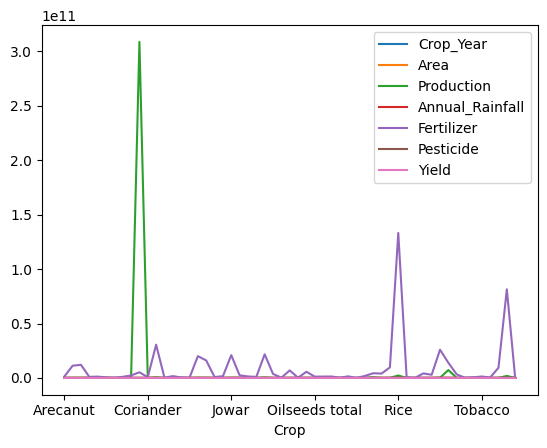

In [ ]:
file.groupby('Crop').sum().plot()
plt.show()

<ipython-input-22-973cb540a8ac>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  file.groupby('Crop_Year').mean().plot()


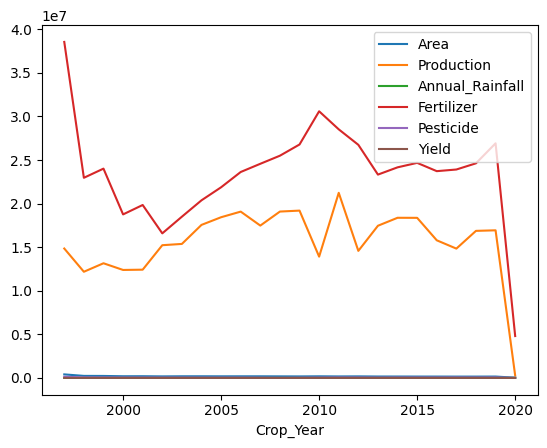

In [ ]:
file.groupby('Crop_Year').mean().plot()
plt.show()

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


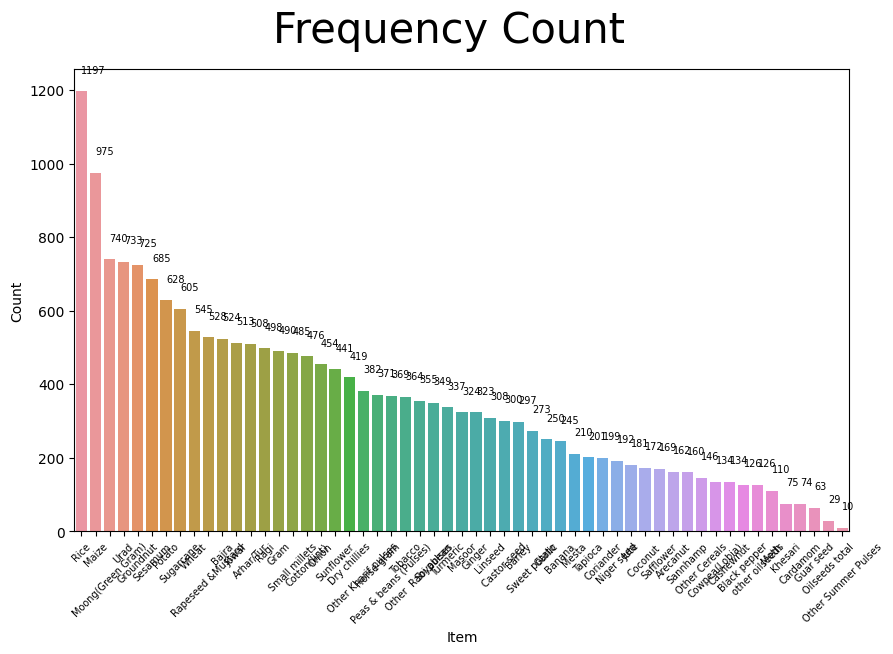

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(10,6))
fig.suptitle('Frequency Count', size=30)

temp_df = file['Crop'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Crop', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Crop + 50, row.Crop, color='black', fontsize=7)


axs.set_xlabel('Item')
axs.set_ylabel('Count')
plt.xticks(rotation=45,fontsize=7)

fig.show()

<ipython-input-113-196f103ef13d>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


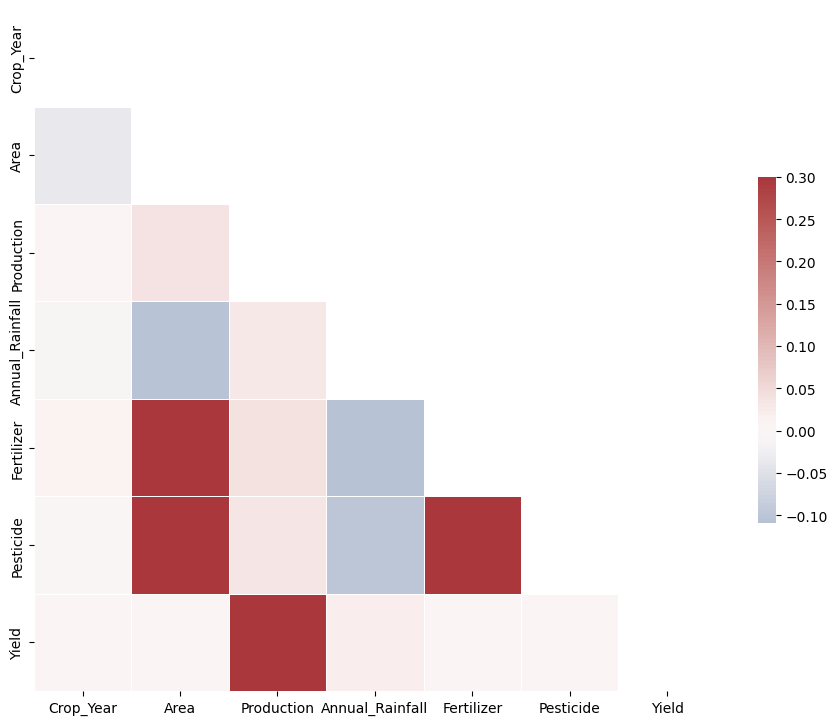

In [ ]:
corr = file.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
plt.subplot(1,2,2)
sns.histplot(x=file['Yield'], color='#500050', kde=True)
plt.title(f'Distribution Plot of Preis')
plt.show()

KeyboardInterrupt: 

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7813025ea680> (for post_execute):


KeyboardInterrupt: 

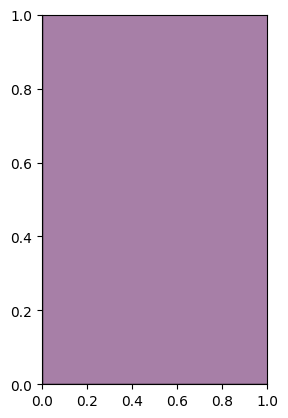

In [ ]:
plt.subplot(1,2,2)
sns.histplot(x=file['Production'], color='#500050', kde=True)
plt.title(f'Distribution Plot of Preis')
plt.show()

Data Preprocessing


In [ ]:
file1=file

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df_onehot = pd.get_dummies(file1, columns=['Crop', 'Season','State'])
data = df_onehot.loc[:, df_onehot.columns != ('Yield', 'Production')]
data['Yield'] = df_onehot['Yield']
data['Production']=df_onehot['Production']




In [ ]:
data

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1997,796.0,22,2051.4,75755.32,246.76,0.238333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1997,1739.0,794,2051.4,165500.63,539.09,0.420909,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19684,1998,4000.0,2000,1498.0,395200.00,1160.00,0.500000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19685,1998,1000.0,3000,1498.0,98800.00,290.00,3.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19686,1997,310883.0,440900,1356.2,29586735.11,96373.73,1.285000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19687,1997,275746.0,5488,1356.2,26242746.82,85481.26,0.016667,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import statsmodels.api as sm

y = data['Yield']
X = data.drop('Yield', axis=1)

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

data = data[cols]
data.insert(len(data.columns), 'Yield (hg/ha)', y)

In [ ]:
from scipy import stats

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 11).all(axis=1)
X = X[filtered_entries]

X.insert(len(X.columns), 'Yield (hg/ha)', y)
data = X

In [ ]:
from sklearn.preprocessing import MinMaxScaler

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

scaler = MinMaxScaler()
data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
data_without_yield.columns = X.columns
data_without_yield.insert(len(data_without_yield.columns), 'Yield (hg/ha)', y)

data = data_without_yield

In [ ]:
data

,Crop_Year,Production,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,Crop_Cashewnut,...,Season_Whole Year,Season_Winter,State_Assam,State_Chhattisgarh,State_Goa,State_Karnataka,State_Kerala,State_Puducherry,State_West Bengal,Yield (hg/ha)
0,0.000000,1.977501e-05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.796087
1,0.000000,1.633736e-06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.710435
2,0.000000,7.671760e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.238333
3,0.000000,4.425385e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5238.051739
4,0.000000,2.768808e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19684,0.043478,6.974328e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
19685,0.043478,1.046149e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000
19686,0.000000,1.537490e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.285000
19687,0.000000,1.913755e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016667


In [ ]:
data

,Crop_Year,Production,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,Crop_Cashewnut,...,Season_Whole Year,Season_Winter,State_Assam,State_Chhattisgarh,State_Goa,State_Karnataka,State_Kerala,State_Puducherry,State_West Bengal,Yield (hg/ha)
0,0.000000,1.977501e-05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.796087
1,0.000000,1.633736e-06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.710435
2,0.000000,7.671760e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.238333
3,0.000000,4.425385e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5238.051739
4,0.000000,2.768808e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19684,0.043478,6.974328e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
19685,0.043478,1.046149e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000
19686,0.000000,1.537490e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.285000
19687,0.000000,1.913755e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016667


In [ ]:
data.fillna(0, inplace=True)
data

,Crop_Year,Production,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,Crop_Cashewnut,...,Season_Whole Year,Season_Winter,State_Assam,State_Chhattisgarh,State_Goa,State_Karnataka,State_Kerala,State_Puducherry,State_West Bengal,Yield (hg/ha)
0,0.000000,1.977501e-05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.796087
1,0.000000,1.633736e-06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.710435
2,0.000000,7.671760e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.238333
3,0.000000,4.425385e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5238.051739
4,0.000000,2.768808e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19684,0.043478,6.974328e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
19685,0.043478,1.046149e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000
19686,0.000000,1.537490e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.285000
19687,0.000000,1.913755e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016667


In [ ]:
#Taking yield as our output variable (prediction variable)
y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

In [ ]:
#Taking 80% of data for training the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):

  # linear least-squares
  slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
  ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')

  ax.scatter(y_test, y_pred, alpha=0.7)

  # Anzeigen der Werte in einer Box
  extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
  ax.legend([extra], [scores], loc='upper left')

  ax.set_xlabel('Actual values in tonnes')
  ax.set_ylabel('Predictes values in tonnes')
  ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))

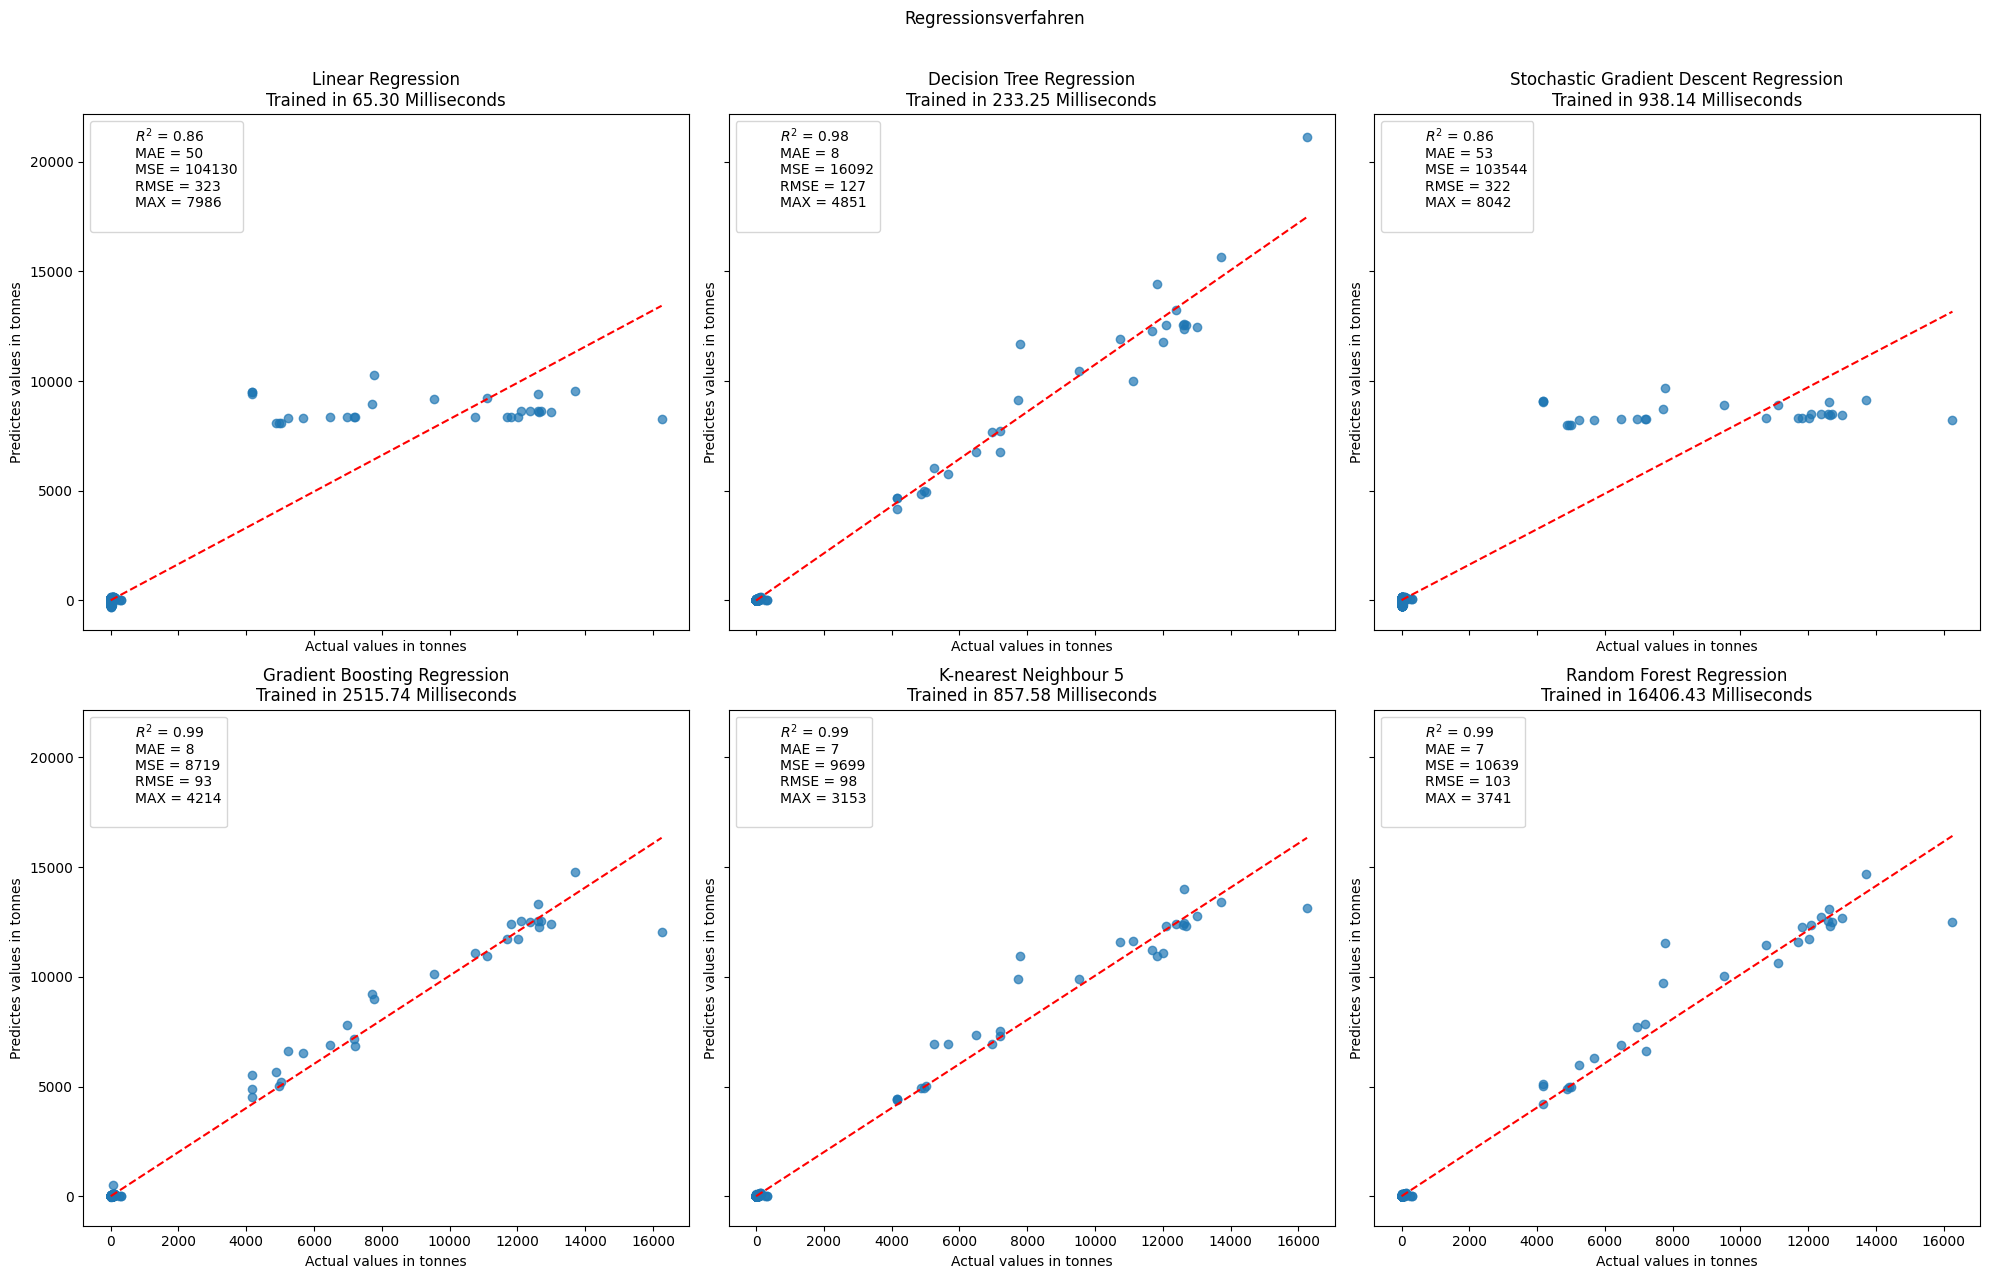

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

import time
from scipy.stats import linregress

lin = LinearRegression()
dtr = DecisionTreeRegressor()
sgd = SGDRegressor(loss='squared_error')
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor()

# Verwendete Regressionen
estimators = [('Linear Regression', lin),
              ('Decision Tree Regression', dtr),
              ('Stochastic Gradient Descent Regression', sgd),
              ('Gradient Boosting Regression', gbr),
              ('K-nearest Neighbour 5', knn),
              ('Random Forest Regression', rfr)]

# Subplot
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 13))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
  start_time = time.time()
  # Train the model
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  estimated_time = time.time() - start_time

  # Anzeigen des Modelles
  plot_regression_results(ax, y_test, y_pred, name, estimated_time,
                          (r'$R^2$ = {:.2f}' + '\n' +
                          r'MAE = {:.0f}' + '\n' +
                          r'MSE = {:.0f}' + '\n' +
                          r'RMSE = {:.0f}' + '\n' +
                          r'MAX = {:.0f}' + '\n')
                          .format(r2_score(y_test, y_pred),
                                  mean_absolute_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred, squared=False),
                                  max_error(y_test, y_pred)))


plt.suptitle('Regressionsverfahren')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Accuracy for each model

In [ ]:
lin.score(X_test, y_pred)

0.8896679949224553

In [ ]:
dtr.score(X_test, y_pred)

0.9714527372510082

In [ ]:
sgd.score(X_test, y_pred)

0.8875583846547516

In [ ]:
gbr.score(X_test, y_pred)

0.996653380060517

In [ ]:
knn.score(X_test, y_pred)

0.9960999324740967

In [ ]:
rfr.score(X_test, y_pred)

1.0

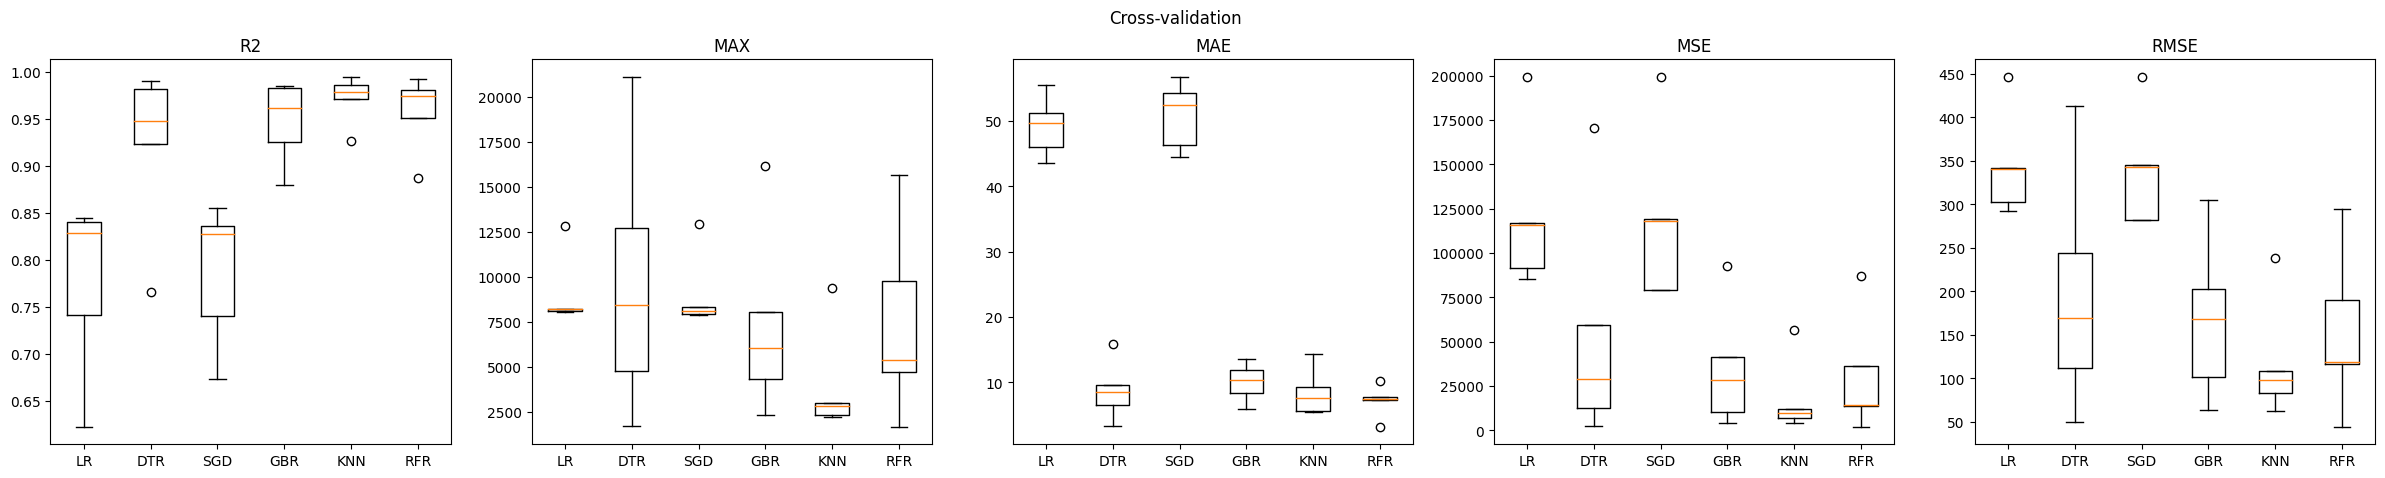

In [ ]:
r2_values = []
max_error_values = []
neg_mean_absolute_error_values = []
neg_mean_squared_error_values = []
neg_root_mean_squared_error_values = []

for name, est in estimators:
  # Kreuzvalidierung
  score = cross_validate(est, X_train, y_train, cv=5,
                         scoring=['r2', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                         n_jobs=-1)

  # Abspeichern der Werte
  r2_values.append(score['test_r2'])
  max_error_values.append(-score['test_max_error'])
  neg_mean_absolute_error_values.append(-score['test_neg_mean_absolute_error'])
  neg_mean_squared_error_values.append(-score['test_neg_mean_squared_error'])
  neg_root_mean_squared_error_values.append(-score['test_neg_root_mean_squared_error'])

# Plotten der Werte
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

names = ['LR', 'DTR', 'SGD', 'GBR', 'KNN', 'RFR']

axs[0].boxplot(r2_values, labels=names)
axs[0].set_title('R2')
axs[1].boxplot(max_error_values, labels=names)
axs[1].set_title('MAX')
axs[2].boxplot(neg_mean_absolute_error_values, labels=names)
axs[2].set_title('MAE')
axs[3].boxplot(neg_mean_squared_error_values, labels=names)
axs[3].set_title('MSE')
axs[4].boxplot(neg_root_mean_squared_error_values, labels=names)
axs[4].set_title('RMSE')

plt.suptitle('Cross-validation')
plt.show()